# Введение в искусственные нейронные сети
# Урок 2. Keras

## Содержание методического пособия:


<ol>
<li>Способы создания нейросетей</li>
<li>Что такое Keras</li>
<li>Основы синтаксиса</li>
<li>Простая нейросеть на Keras</li>
<li>Оптимизаторы</li>
<li>Callback'и</li>
</ol>

## Способы создания нейросетей

Нейросети это математические модели. Программируя на любом языке можно решать задачи, связанные с математикой. Однако встает вопрос, какой язык подойдет для этого больше? Не считая учебных нейросетей, нейросети как правило работают с большим количеством данных. Поэтому, чтобы обучение нейросетей происходило с приемлимой скоростью нужно использовать быстрый язык. Например Си. Но так как язык Си - это язык с низким уровнем абстракции, то программировать и модифицировать на нем нейросети было бы крайне затруднительно. 

Хорошо может подойти для этих целей язык Python. Так как он с одной стороны имеет высокий уровень абстракции, с другой стороны операции с массивами данных могут сделать его библиотеки, написанные на Си. Таким способом мы пользовались на первом уроке. Однако, если писать нейросети таким образом, то будет много повторяющегося кода, поскольку архитектуры нейросетей остаются одинаковыми и, зачастую, у них только меняются параметры. Кроме этого нам может понадобиться хорошо знать архитектуры самых разных нейронных сетей, чтобы реализовать их вручную. Работа таким образом затруднительна для людей, не имеющих достаточной подготовки, а для имеющих может быть наоборот рутиной.

Существуют фреймворки для созданий нейронных сетей. Они являются, пожалуй основным рабочим способом создания нейронных сетей. Вот их неполный перечень:

1. TensorFlow
2. PyTorch
3. Keras
4. Microsoft Cognitive Toolkit (CNTK)
5. Caffe

<img src='https://drive.google.com/uc?export=view&id=1Udb8e5TQCRgaaiSje8sCks8M2Rw-UcpV'>

Все эти инструменты отранжированы в порядке возрастания уровня абстракции. Соответственно, говоря о плюсах и минусах того или иного инструмента, мы должны понимать, в принципе плюсы и минусы повышения уровня абстракции. Чем он выше, тем меньше производительность, и тем меньше его гибкость и, наоборот.

Самый популярный фреймворк для создания нейросетей TensorFlow. Самый популярный для обучения - Keras. На этом уроке мы изучим с вами Keras, а на следующим TensorFlow. Также стоит отметить, что эти фреймворки взаимосвязаны - Keras как правило работает поверх TensorFlow, а сам TensorFlow позволяет пользовать средствами Keras при необходимости.

## Что такое Keras

Keras появился относительно недавно - в 2015 г. Но за это время стал одним из самых популярных фреймворков для создания нейросетей и фактически стандартом для использования его начинающими.

В чем причина его популярности? Keras позволяет создавать на высоком уровне абстракции. Т.е. не нужно вручную реализовать с помощью математикаподобного кода те или иные элементы нейронной сети. Мы можем оперировать слоями, количеством нейронов в них, выбором функции активации и т.д. В то же время keras содержит инструментарий для всего того, что может понадобиться для работы - например ряд встроенных датасетов, возможность обрабатывать изображения.

В техническом плане Keras это оболочка над инструментами меньшей степени абстракции. На выбор он может работать поверх TensorFlow, Microsoft Cognitive Toolkit, Theano.

Keras как и любой высокоабстрактный инструмент имеет изъяны в качестве меньшей гибкости и производительности, чем тот же tensorflow.

Стоит также отметить, что Google официально поддерживает Keras, его автор François Chollet, является сотрудником Google. TensorFlow сам в свою очередь позволяет использовать возможности Keras, т.е. в нем заложена возможность переходить на более высокой уровень абстракции.

В данном уроке мы с вами рассмотрим пример обучения нейронной сети с помощью Keras. Но прежде давайте посмотрим на основы синтаксиса Keras и стандартные задачи, которые нужно выполнить при обучении нейронной сети.

## Основы синтаксиса

**Установка и работа с данными**

Для начала необходимо установить keras.

In [ ]:
# !pip install keras

In [ ]:
import keras
keras.__version__

'2.7.0'

In [ ]:
keras.backend.backend()

'tensorflow'

Давайте попробуем получить датасет mnist и проанализировать его содержимое.

In [ ]:
import matplotlib.pyplot as plt

from keras.datasets import mnist
import numpy as np


(X_train, y_train_labels), (X_test, y_test_labels) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 3


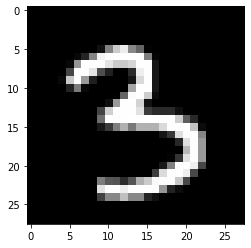

In [ ]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

В нашем случае наш тренировочный датасет состоит из 60 000 изображений и тестовый из 10 000 и они поделены по умолчанию.

Нам теперь нужно конверитировать значения пикселей из вида от 0 до 255 в набор значений от 0 до 1.

<img src='https://slideplayer.com/slide/13293044/79/images/9/Data+Normalization+Normalizing+the+data+make+neural+network+easier+to+learn..jpg'>



In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
# Нормировка
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [ ]:
# Вытягивание признаков
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Простая нейросеть на Keras

### **Создание модели**

После первичной подготовки данных дальше как правило следует создание модели нейронной сети, которая будет учиться на этих данных.

Ниже типичный код учебной нейросети.

In [ ]:
from keras.layers import Dense
from keras.models import Sequential


# define the keras model
model = Sequential()
model.add(Dense(5, input_shape=(10,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


Давайте разберемся с теми командами, которые нам встетились в этом коде.

Sequential - позволяет создать нейросети, где слои строятся последовательно. Сигнал в них передается от одного слоя к другому. В противовес этой разновидности есть нейросети, где сигнал может не сразу передаваться в следующий слой. Такие нейросети мы разберем в следующих уроках.

Dense - позволяет каждому нейрону быть связанному с другим нейронном. В противовес этому может быть необходимость не делать так много связей. Неполносвязнные архитектуры мы также разберем на этом курсе, они основа компьютерного зрения.

Цифры 5, 1 обозначают количество нейронов в каждом конкретном слое

Activation - позволяет определить формулу по которой будет активироваться нейрон.

Давайте попробуем обучить нейросеть различать рукописные цифры.

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# is the same
model = Sequential([
    Dense(64, input_shape=(28 * 28,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 64)                50240     
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


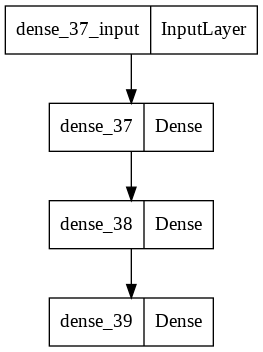

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model)

In [ ]:
config = model.get_config()
config

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_5_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_5',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializ

In [ ]:
model = Sequential([
    Dense(6, input_shape=(28 * 28,), activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 4710      
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 4,717
Trainable params: 4,717
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = model.from_config(config)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


### **Компиляция модели**

На этапе компиляции модель с заданными параметрами ранее создается. Вот типичный учебный пример:

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

Однако на этой стадии мы должны сделать еще некоторые настройки нейронной сети. Разберем команды из кода выше.

- loss - позволяет задать формулу, по которой будет определяться степень ошибки нейронной сети.
- optimizer - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети (backpropagation).
- metrics - позволяет определить критерии, по которым будет оцениваться степень обученности нейросети.
    

### **Передача данных для обучения нейросети**

После того как нейросеть создана, можно передавать ей данные для обучения. Ниже типичный пример кода для этого.


In [ ]:
y_train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
from keras.utils.np_utils import to_categorical


y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

<img src='https://drive.google.com/uc?export=view&id=1j8SxKYEi12jzJXi_bPO28q5SV9emuu0Y'>

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# передача обучающего датасета keras модели

# можно явно указать валидационный датасет
# history = model.fit(X_train, y_train,
#                     epochs=5,
#                     batch_size=10,
#                     verbose=1,
#                     validation_data=(X_test, y_test)
#                     )


# либо можно указать разбиение на валидацию
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1000, 
                    verbose=1,
                    validation_split=0.2)

Epoch 1/5
48/48 [==============================] - 0s 8ms/step - loss: 0.2142 - accuracy: 0.9334 - val_loss: 0.1968 - val_accuracy: 0.9379
Epoch 2/5
48/48 [==============================] - 0s 7ms/step - loss: 0.1803 - accuracy: 0.9451 - val_loss: 0.1798 - val_accuracy: 0.9444
Epoch 3/5
48/48 [==============================] - 0s 7ms/step - loss: 0.1665 - accuracy: 0.9497 - val_loss: 0.1706 - val_accuracy: 0.9494
Epoch 4/5
48/48 [==============================] - 0s 7ms/step - loss: 0.1582 - accuracy: 0.9525 - val_loss: 0.1644 - val_accuracy: 0.9509
Epoch 5/5
48/48 [==============================] - 0s 7ms/step - loss: 0.1523 - accuracy: 0.9547 - val_loss: 0.1598 - val_accuracy: 0.9517


Разберем команды из этого примера.

- X_train, y_train - содержат все обучающие данные
- epochs - определяет сколько раз через нейросеть должен пройти весь набор данных
- bath_size - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения.
- verbose - позволяет определять информацию, которую вы видите во время обучения нейронной сети.
- validation data - содержат все валидационные данные

In [ ]:
history.history

{'accuracy': [0.9333541393280029,
  0.9451249837875366,
  0.9497083425521851,
  0.9524791836738586,
  0.9546874761581421],
 'loss': [0.2142169326543808,
  0.18026940524578094,
  0.1664809286594391,
  0.15816259384155273,
  0.15228356420993805],
 'val_accuracy': [0.9379166960716248,
  0.9444166421890259,
  0.9494166374206543,
  0.9509166479110718,
  0.9517499804496765],
 'val_loss': [0.1968257576227188,
  0.17976829409599304,
  0.1705785095691681,
  0.16442911326885223,
  0.15984994173049927]}

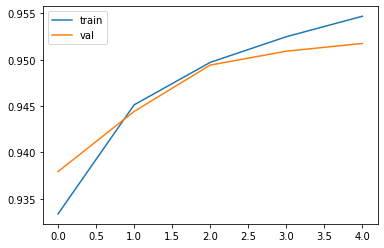

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend();

In [ ]:
# steps_per_epoch

history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=10,
                    steps_per_epoch=100, 
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/5
100/100 [==============================] - 3s 32ms/step - loss: 0.1326 - accuracy: 0.9530 - val_loss: 0.1589 - val_accuracy: 0.9515
Epoch 2/5
100/100 [==============================] - 2s 23ms/step - loss: 0.1160 - accuracy: 0.9660 - val_loss: 0.1583 - val_accuracy: 0.9518
Epoch 3/5
100/100 [==============================] - 2s 24ms/step - loss: 0.1572 - accuracy: 0.9560 - val_loss: 0.1509 - val_accuracy: 0.9537
Epoch 4/5
100/100 [==============================] - 2s 24ms/step - loss: 0.1621 - accuracy: 0.9560 - val_loss: 0.1470 - val_accuracy: 0.9555
Epoch 5/5
100/100 [==============================] - 2s 23ms/step - loss: 0.1423 - accuracy: 0.9560 - val_loss: 0.1459 - val_accuracy: 0.9545


### **Оценка обученности нейронной сети**

Следующей стадией может быть проверка обученности нейронной сети.

In [ ]:
loss, metric = model.evaluate(X_test, y_test, batch_size=128)
loss, metric

79/79 [==============================] - 0s 4ms/step - loss: 0.1161 - accuracy: 0.9652


(0.11607292294502258, 0.9652000069618225)

В данном случае мы просто указываем какую модель на каких данных мы хотим проверить.

### **Запуск нейронной сети для выполнения работы**

На этой стадии мы можем попробовать запустить нейронную сеть на данных которые мы хотели бы чтобы она оценила. Осуществить распознавания объекта на фотографии например.
Вот код для этих целей.

В качестве аргумента здесь указывается массив данных.

In [ ]:
X_test[0][None].shape

(1, 784)

In [ ]:
predictions = model.predict(X_test[0][None])
predictions

array([[0.8099854 , 0.67365956, 0.96138257, 0.9867922 , 0.00163364,
        0.2703302 , 0.00148949, 0.99999404, 0.5698352 , 0.6610501 ]],
      dtype=float32)

In [ ]:
pred_labels = np.argmax(predictions, axis=1)
pred_labels

array([7])

In [ ]:
y_test_labels[:3]

array([7, 2, 1], dtype=uint8)

Мы с вами рассмотрели основные стадии процесса обучения нейросети и команды Keras. Безусловно, здесь приведен далеко неполный перечень возможностей Keras. У Keras есть также возможность сохранять созданную нейросеть, запускать уже имеющиюся, различные средства для создания нейросетей разных архитектур и другое. С чем-то из арсенала Keras мы с вами познакомимся по ходу курса, а с остальным вы можете познакомиться на сайте Keras в разделе документация.

In [ ]:
# Save the weights to disk
model.save_weights('model_weights.h5')

# Save the model to disk
model.save('model.h5')

In [ ]:
config_mnist = model.get_config()
config_mnist

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_5_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_5',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializ

In [ ]:
from keras.models import load_model

# Load the model from disk
load_model('model.h5').summary()


# load_model('model_weights.h5')  # ValueError: No model found in config file

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Load the model weights from disk
model.from_config(config_mnist)
model.load_weights('model_weights.h5')

## Оптимизаторы

<img src='https://drive.google.com/uc?export=view&id=12D44wSjCypIi0O9N6Uj36w5tWkhW79pG'>


Основные проблемы, которые могут возникнуть в процессе оптимизации:
1. Застревание в локальных минимумах или седловых точках, коих может быть очень много.
2. Сложный ландшафт целевой функции: плато чередуются с регионами сильной нелинейности. Производная на плато практически равна нулю, а внезапный обрыв, наоборот, может отправить нас слишком далеко.
3. Слишком маленькая скорость обучения заставляет алгоритм сходиться очень долго и застревать в локальных минимумах, слишком большая — «пролетать» узкие глобальные минимумы или вовсе расходиться.

<img src='https://drive.google.com/uc?export=view&id=13JItksqmvlEe7ponSpskIWEmAFdXD4CW' width=500>

### SGD (+ momentum)



<img src='https://drive.google.com/uc?export=view&id=1JMoY1y1oZUtiicvCuhxhliiLBLoNl7bA'>

Правило обновления весов w с градиентом g, когда импульс == 0:

$w^{k} = w^{k-1} - \eta * {\nabla Q(w^{k-1}, X)}$

Правило обновления весов w с градиентом g, когда импульс > 0:

$velocity = momentum * velocity - \eta * {\nabla Q(w^{k-1}, X)}$<br>
$w^{k} = w^{k-1} + velocity$

<img src='https://drive.google.com/uc?export=view&id=1h0u3hNo2cjDRoq0FVdXIScgRo6Iq687y'>

Объяснение, как работает SGB + Momentum [здесь](https://youtu.be/CKLwvuKWQjo).

Засчет добавления импульса получается сглаживание оптимизации.

|$t_1$|$t_2$|..|$t_n$|
|--|--|--|--|
|$g_1$|$g_2$|..|$g_n$|

$\gamma = 0.5$

$v_1 = g_1$<br>
$v_2 = \gamma * v_1 + g_2 = 0.5 * g_1 + g_2$<br>
$v_3 = \gamma * v_2 + g_3 = \gamma (\gamma * v_1 + g_2) + g_3 = \gamma^2 * g_1 + \gamma * g_2 + g_3 = 0.25 * g_1 + 0.5 * g_2 + g_3$<br>

In [ ]:
from keras import optimizers

optimizers.gradient_descent_v2.SGD(learning_rate=0.01, momentum=0.5)

### AdaGrad


Объяснение, как работает Adagrad [здесь](https://youtu.be/GSmW59dM0-o).

Gradient Descent:
$ w^{k} = w^{k-1} - \eta\nabla Q(w^{k-1}, X)$.

В Adagrad используются разные скорости обучения в зависимости от итерации:
<h3>$ w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X) $</h3>

<h2>$\eta_{k} = \frac{\eta}{\sqrt{\alpha_k + \epsilon}}$</h2>
где  $\epsilon$ - маленькое число, чтобы не было деления на ноль.
<h4>$\alpha_k = \sum_{i=0}^k{\nabla Q(w^{k-1}, X)}^2$</h4>

Обновление весов:

<h4>$ w^{k} = w^{k-1} - \eta_k\nabla Q(w^{k-1}, X)$</h4>

Получается, что когда $\alpha$ становится большим числом, то $\eta_{k}$ становится меньше, то есть с увеличением итерации - уменьшается скорость обучения, а значит и уменьшается скорость изменения весов.

Но есть одна очень большая проблема - чем больше итераций, тем $\alpha$ больше, скорость обучения меньше, это приведет к тому, что изменение весов может стать совсем незаметным. Но это решаемо с помощью RMSProp.

In [ ]:
optimizers.adagrad_v2.Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)

### RMSProp (Leaky AdaGrad)

Объяснение, как работает RMSprop [здесь](https://youtu.be/9wFBbAQixBM).

Этот оптимизатор исправляет проблему с неизменяемыми весами в Adagrad засчет введения ограничения на градиенты весов.

<h2>$\eta_{k} = \frac{\eta}{\sqrt{W_{avg_k} + \epsilon}}$</h2>
где  $\epsilon$ - маленькое число, чтобы не было деления на ноль.

$W_{avg_{0}} = 0$

<h4>$W_{avg_k} = \rho * W_{avg_{k-1}}+(1-\rho){\nabla Q(w^{k-1}, X)}^2$</h4>

Обновление весов:

<h4>$ w^{k} = w^{k-1} - \eta_k\nabla Q(w^{k-1}, X)$</h4>


In [ ]:
optimizers.rmsprop_v2.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)

### Adam

Здесь соединились два плюса предыдущих оптимизаторов:
1. Импульс (дает сглаживание оптимизации)
2. Постепенное уменьшение скорости обучения

<h4>$V_{k} = \beta_1 * V_{k-1} + g_k$</h4>

<h4>$W_{avg_k} = \beta_2 * W_{avg_{k-1}}+(1-\beta_2){\nabla Q(w^{k-1}, X)}^2$</h4>

Обновление весов:
<h4>$ w^{k} = w^{k-1} - \frac{\eta * V_k}{\sqrt{W_{avg_k} + \epsilon}}$</h4>


In [ ]:
optimizers.adam_v2.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

### Эксперимент с разными оптимизаторами для одной начальной модели

1. создаем модель model
2. сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
3.\* создаем рабочую модель $model_i$, куда будем загружать эти веса (она должна быть идентичной структуры) 
4.\* загружаем веса $model_i$.load_weights('model.h5')
5.\* компилируем $model_i$, с одним из оптимизаторов
6. вычисляем ошибку для $model_i$, без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
7. проводим обучение модели и пишем ошибки в истории history
8. выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных

*Либо пункты сохранения воспроизводимости можно заменить фиксацией псевдо рандома:


```
# for reproducible weights initialization
import tensorflow as tf
tf.random.set_seed(1)

# model.layers[0].weights
```



In [ ]:
# создаем модель model
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(32, activation='relu'),
    Dense(10, activation='sigmoid'),
])

# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model_weights.h5')

Epoch 1/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7470 - accuracy: 0.7903 - val_loss: 0.3611 - val_accuracy: 0.8942
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3225 - accuracy: 0.9070 - val_loss: 0.2717 - val_accuracy: 0.9219
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2571 - accuracy: 0.9258 - val_loss: 0.2302 - val_accuracy: 0.9343
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2179 - accuracy: 0.9368 - val_loss: 0.2004 - val_accuracy: 0.9428
Epoch 1/4
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5614 - accuracy: 0.5741 - val_loss: 0.9774 - val_accuracy: 0.7826
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8088 - accuracy: 0.8077 - val_loss: 0.6592 - val_accuracy: 0.8394
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6183 - accuracy: 0.8425 - val_loss: 0.5467 - val_accuracy: 0.8620

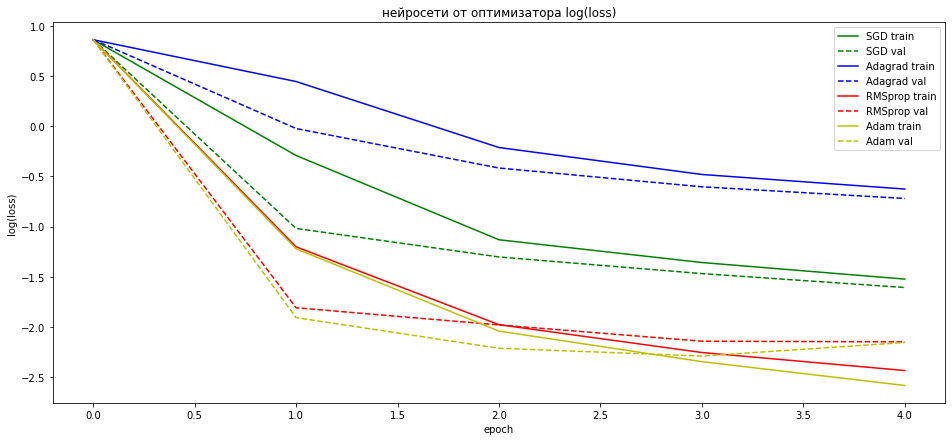

CPU times: user 2min 22s, sys: 24.7 s, total: 2min 47s
Wall time: 2min 46s


In [ ]:
%%time


# будем сохранять модели в словарь
models = {}


plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 4
batch_size = 32

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([keras.optimizers.gradient_descent_v2.SGD(),
                             keras.optimizers.adagrad_v2.Adagrad(),
                             keras.optimizers.rmsprop_v2.RMSprop(),
                             keras.optimizers.adam_v2.Adam()]):
    
    # создаем рабочую модель  model_i, куда будем загружать эти веса (она должна быть идентичной структуры)
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(32, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    # загружаем веса model_i.load_weights('model.h5')
    model_i.load_weights('model_weights.h5')
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)
    
    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    # картинки
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')
    print('=' * 20)

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

Epoch 1/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6446 - accuracy: 0.8267 - val_loss: 0.3283 - val_accuracy: 0.9056
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3009 - accuracy: 0.9133 - val_loss: 0.2590 - val_accuracy: 0.9255
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2513 - accuracy: 0.9282 - val_loss: 0.2291 - val_accuracy: 0.9340
Epoch 4/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2187 - accuracy: 0.9375 - val_loss: 0.2084 - val_accuracy: 0.9398
Epoch 1/4
1875/1875 [==============================] - 7s 4ms/step - loss: 1.3839 - accuracy: 0.6520 - val_loss: 0.8155 - val_accuracy: 0.8265
Epoch 2/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6700 - accuracy: 0.8453 - val_loss: 0.5483 - val_accuracy: 0.8707
Epoch 3/4
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5169 - accuracy: 0.8705 - val_loss: 0.4602 - val_accuracy: 0.8837

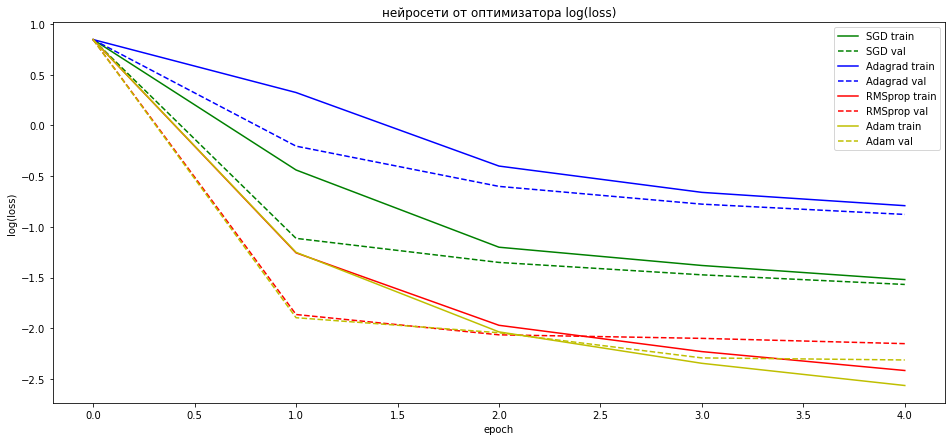

CPU times: user 2min 22s, sys: 25.2 s, total: 2min 48s
Wall time: 2min 45s


In [ ]:
%%time

# будем сохранять модели в словарь
models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 4
batch_size = 32

# вектор для вывода результатов
epoch = np.arange(num_epochs+1)

# будем изменять оптимизаторы
for i, i_optim in enumerate([keras.optimizers.gradient_descent_v2.SGD(),
                             keras.optimizers.adagrad_v2.Adagrad(),
                             keras.optimizers.rmsprop_v2.RMSprop(),
                             keras.optimizers.adam_v2.Adam()]):
    
    # создаем рабочую модель  model_i с зафиксированными весами
    import tensorflow as tf
    tf.random.set_seed(1)
    
    model_i = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(32, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    # компилируем model_i с одним из оптимизаторов
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    # вычисляем ошибку для modeli без обучения
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    # проводим обучение модели 
    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=1)

    # записываем обученную модель в словарь
    models[i_optim.get_config()['name']] = model_i

    # картинки
    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')
    print('=' * 20)

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [ ]:
model_i = models['Adam']

In [ ]:
model_i.optimizer.get_config()

{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

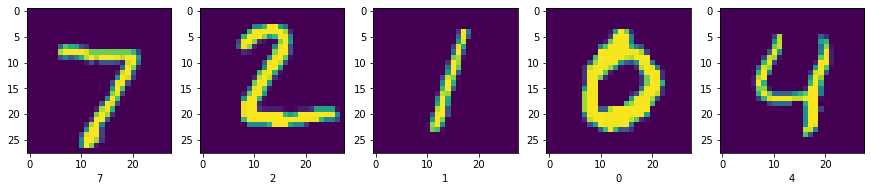

In [ ]:
N = 5
y_pred = model_i.predict(X_test[:N, :])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * N, 5))

for i in range(N):
  plt.subplot(1, N, i+1)
  plt.imshow(X_test[i,:].reshape(28, 28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

In [ ]:
y_pred_class

array([7, 2, 1, 0, 4])

## Callbacks

Callback (обратные вызовы) – набор функций, применяемых в определенные моменты во время процедуры обучения. Вы можете использовать функции callback чтобы получить информацию о внутреннем состоянии модели в процессе обучения. Нужно передавать список callback’ов (именованным аргументом callbacks) методу .fit() модели. Подходящие методы callback будут вызваны на каждой стадии обучения.

Рассмотрим основные callback'и, с остальными можете ознакомиться в [документации](https://ru-keras.com/callbacks/).

### ModelCheckpoint


Сохранение модели после каждой эпохи.

Filepath может содержать именованные опции форматирования, заполняемые значениями epoch и ключами в logs (передаваемыми on_epoch_end).

К примеру: если filepath назван weights.{epoch:02d}-{val_loss:.2f}.hdf5, тогда модель будет сохраняться с номером эпохи и validation_loss в имени файла.

**Аргументы:**

— filepath: строка, путь сохранения модели

— monitor: параметр для мониторинга

— verbose: режим отображения, 0 или 1

— save_best_only: если save_best_only=True, если результат текущей эпохи хуже предыдущей, он не будет сохранен.

— save_weights_only: если True, тогда будут сохраняться только веса модели (model.save_weights(filepath)), в противном случае будет сохраняться вся модель (model.save(filepath)).

— mode: один из {auto, min, max}. Если save_best_only=True, решение о перезаписи текущего файла будет приниматься в зависимости от уменьшения/увеличения параметра мониторинга. Для val_acc, необходим max, для val_loss необходим min. В auto режиме, mode выбирается в зависимости от имени monitor.

— period: Интервал (число эпох) между сохранениями.

In [ ]:
from keras import callbacks

In [ ]:
model_checkpoint = callbacks.ModelCheckpoint(filepath='model_best_{epoch}',
                                   monitor='val_loss',
                                   verbose=1,
                                   save_best_only=True,
                                   save_weights_only=False,
                                   mode='auto',
                                   period=1,
                                #    save_freq=2
                                   ) 

model.compile(optimizer=keras.optimizers.adam_v2.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          epochs=num_epochs,
          steps_per_epoch=10,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[model_checkpoint])

Epoch 1/4
 6/10 [=================>............] - ETA: 0s - loss: 0.0660 - accuracy: 0.9807
Epoch 00001: val_loss improved from inf to 0.09564, saving model to model_best_1
INFO:tensorflow:Assets written to: model_best_1/assets
10/10 [==============================] - 3s 253ms/step - loss: 0.0694 - accuracy: 0.9796 - val_loss: 0.0956 - val_accuracy: 0.9712
Epoch 2/4
 9/10 [==========================>...] - ETA: 0s - loss: 0.0653 - accuracy: 0.9814
Epoch 00002: val_loss improved from 0.09564 to 0.09379, saving model to model_best_2
INFO:tensorflow:Assets written to: model_best_2/assets
10/10 [==============================] - 2s 265ms/step - loss: 0.0646 - accuracy: 0.9815 - val_loss: 0.0938 - val_accuracy: 0.9727
Epoch 3/4
 9/10 [==========================>...] - ETA: 0s - loss: 0.0618 - accuracy: 0.9825
Epoch 00003: val_loss improved from 0.09379 to 0.09136, saving model to model_best_3
INFO:tensorflow:Assets written to: model_best_3/assets
10/10 [==============================] - 2s

In [ ]:
from google.colab import files
files.download('/content/model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'/content/drive/MyDrive/IMG_2017.jpg'

### EarlyStopping


Прекращение обучения, когда параметр monitor перестает улучшаться.

**Аргументы**

— monitor: параметр для мониторинга

— min_delta: минимальное значение изменения величины monitor, расцениваемое как улучшение, то есть, если абсолютное изменение меньше min_delta, то улучшение не засчитывается

— patience: число эпох, за которые величина monitor не улучшается, после которых обучение будет остановлено. Проверочные величины могут производиться не после каждой эпохи если validation_freq (model.fit(validation_freq=5)) больше единицы.

— verbose: режим отображения, 0 или 1.

— mode: один из {auto, min, max}. В режиме min, обучение остановится когда величина monitor перестанет уменьшаться; в режиме max, обучение остановится когда величина monitor перестанет увеличиваться; в режиме auto, mode выбирается в зависимости от имени monitor.

— baseline: значение, которое должна достичь величина monitor. Обучение прекратится, если модель не достигла baseline.

— restore_best_weights: восстанавливать ли веса модели с эпохи с лучшем значением параметра monitor. Если False, веса модели будут загружены из последней шага обучения.

In [ ]:
early_stop = callbacks.EarlyStopping(monitor='loss',
                                     min_delta=0,
                                     patience=1,
                                     verbose=1,
                                     mode='auto',
                                     baseline=0.006,
                                     restore_best_weights=False)


model.fit(X_train, y_train,
          epochs=num_epochs,
          steps_per_epoch=100,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/4
100/100 [==============================] - 2s 22ms/step - loss: 0.0229 - accuracy: 0.9945 - val_loss: 0.0811 - val_accuracy: 0.9758
Epoch 2/4
100/100 [==============================] - 2s 18ms/step - loss: 0.0209 - accuracy: 0.9950 - val_loss: 0.0833 - val_accuracy: 0.9757
Epoch 00002: early stopping


### ReduceLROnPlateau

Уменьшение скорости обучения, когда метрика перестала улучшаться.

Модели зачастую работают лучше если уменьшать скорость обучения. Этот callback следит за параметром monitor и, если не происходит улучшения за patience эпох, уменьшает скорость обучения.


**Аргументы**

— monitor:  параметр для мониторинга

— factor: коэффициент уменьшения скорости обучения. new_lr = lr * factor

— patience: число эпох, за которые величина monitor не улучшается, после которых обучение будет остановлено. Проверочные величины могут производиться не после каждой эпохи если validation_freq (model.fit(validation_freq=5)) больше единицы.

— verbose: int. 0: «тихий» режим, 1: выводить сообщения

— mode: один из {auto, min, max}. В режиме min, скорость обучения уменьшится когда величина monitor перестанет уменьшаться; в режиме max, скорость обучения уменьшится когда величина monitor перестанет увеличиваться; в режиме auto, mode выбирается в зависимости от имени monitor.

— min_delta: минимальное значение изменения величины monitor, расцениваемое как улучшение, то есть, если абсолютное изменение меньше min_delta, то улучшение не засчитывается

— cooldown: число эпох после уменьшения скорости обучения, которые должны пройти, прежде чем стандартный процесс уменьшения возобновится.

— min_lr: нижняя граница скорости обучения

In [ ]:
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                        factor=0.1,
                                        patience=0,
                                        verbose=1,
                                        mode='auto',
                                        min_delta=0.001,
                                        cooldown=0,
                                        min_lr=1e-10) 

model.fit(X_train, y_train,
          epochs=num_epochs,
          steps_per_epoch=100,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[reduce_lr])

Epoch 1/4
100/100 [==============================] - 2s 18ms/step - loss: 0.1409 - accuracy: 0.9593 - val_loss: 0.1402 - val_accuracy: 0.9585 - lr: 0.0010
Epoch 2/4
100/100 [==============================] - 2s 18ms/step - loss: 0.1258 - accuracy: 0.9640 - val_loss: 0.1288 - val_accuracy: 0.9602 - lr: 0.0010
Epoch 3/4
100/100 [==============================] - 2s 18ms/step - loss: 0.1136 - accuracy: 0.9671 - val_loss: 0.1241 - val_accuracy: 0.9618 - lr: 0.0010
Epoch 4/4
 91/100 [==========================>...] - ETA: 0s - loss: 0.1019 - accuracy: 0.9709
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
100/100 [==============================] - 1s 13ms/step - loss: 0.1024 - accuracy: 0.9706 - val_loss: 0.1206 - val_accuracy: 0.9626 - lr: 0.0010


## Домашнее задание <a class='anchor' id='hw'>

Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

## Дополнительные материалы


1. [Документация Keras](https://keras.io/about/)
2. [Документация Keras на русском](https://ru-keras.com/home/)
3. [Топ-10 фреймворков для ИИ](https://vc.ru/ml/80391-top-10-freymvorkov-dlya-iskusstvennogo-intellekta-chast-pervaya)
4. [Deep Learning-All Optimizers In One Video](https://www.youtube.com/watch?v=TudQZtgpoHk)

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io/</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>

## Определения

**Keras** — открытая нейросетевая библиотека, написанная на языке Python. Она представляет собой надстройку над фреймворками Deeplearning4j, TensorFlow и Theano.


**Порядок работы с нейронной сетью**:
1. Подготовка данных (нормализация)
2. Создание архитектуры модели
3. Компиляция модели
    - выбор функции потерь
    - выбор метрики качества
    - выбор оптимизатора
4. Обучение модели
5. Оценка её качества

___________

**Callback (обратные вызовы)** – набор функций, применяемых в определенные моменты во время процедуры обучения.
